
## 📋 PROBLEMA
Los hospitales y centros de salud en Perú enfrentan desafíos en la gestión
eficiente de recursos para realizar tamizajes (screenings) de salud mental.
La demanda de tamizajes varía según región, tipo de trastorno, grupo etario,
y temporada, lo que dificulta la planificación y asignación óptima de personal
y recursos.

## 💡 SOLUCIÓN
Desarrollar un modelo de Machine Learning que prediga la tasa de positividad
de tamizajes de salud mental basándose en características demográficas,
geográficas y temporales. Esto permitirá anticipar la demanda y optimizar
la asignación de recursos.

## 🎯 OBJETIVO
Predecir la tasa de positividad de tamizajes de salud mental para:
- Optimizar la asignación de personal médico especializado
- Mejorar la gestión de recursos hospitalarios
- Priorizar intervenciones preventivas en poblaciones de alto riesgo
- Reducir tiempos de espera y mejorar la calidad de atención

## 📊 DATASET
- Registros: ~200,000 tamizajes
- Periodo: 2017
- Variables: 45 (temporales, geográficas, demográficas, clínicas)
- Target: Tasa_Positividad

## II. Data Understanding


In [ ]:
# =============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# =============================================================================

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

import warnings
warnings.filterwarnings('ignore')

### 2.1 Collect Initial Data

In [ ]:
# ============================================================================
# 2. CARGA DE DATOS
# ============================================================================
df = pd.read_csv('tamizajes.csv', sep=';', encoding='latin1')

print(f"✅ Dataset cargado exitosamente")
print(f"   - Registros: {df.shape[0]:,}")
print(f"   - Variables: {df.shape[1]:,}")


✅ Dataset cargado exitosamente
   - Registros: 236,527
   - Variables: 11


### 2.2 Describe Data

In [ ]:
print(df.info())
print(df.head())
print(df.tail())
print(df.describe().round(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236527 entries, 0 to 236526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Anio             236527 non-null  int64 
 1   NroMes           236527 non-null  int64 
 2   ubigeo           236527 non-null  int64 
 3   Departamento     236527 non-null  object
 4   Provincia        236527 non-null  object
 5   Distrito         236527 non-null  object
 6   Sexo             236527 non-null  object
 7   Etapa            236527 non-null  object
 8   GrupoTamizaje    236527 non-null  object
 9   DetalleTamizaje  236527 non-null  object
 10  Casos            236527 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 19.9+ MB
None
   Anio  NroMes  ubigeo Departamento Provincia Distrito Sexo    Etapa  \
0  2017       1   20101       ANCASH    HUARAZ   HUARAZ    F  18 - 24   
1  2017       1   20101       ANCASH    HUARAZ   HUARAZ    F  40 - 59   
2  2017       1 

### 2.3 Verify Data Quality

In [ ]:
# Valores nulos, duplicados, tipos de datos
missing_data = pd.DataFrame({
   'Columna': df.columns,
   'Valores_Nulos': df.isnull().sum(),
   'Porcentaje': (df.isnull().sum()/len(df)*100).round(2)
})
missing_data = missing_data[missing_data['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
else:
    print("✅ No se encontraron valores nulos en el dataset")

duplicates = df.duplicated().sum()
print(f"\n📌 Registros duplicados: {duplicates} ({(duplicates/len(df)*100):.2f}%)")

✅ No se encontraron valores nulos en el dataset

📌 Registros duplicados: 0 (0.00%)


### 2.4 Explore Data

#### 2.4.1 Análisis de la Variable Objetivo


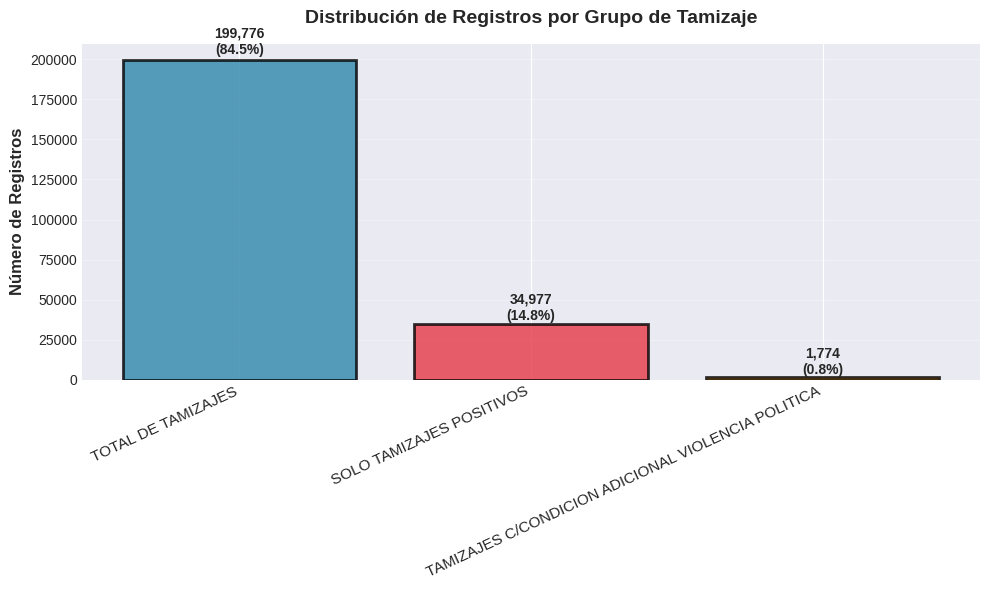

In [ ]:
# Contar registros por grupo
grupo_counts = df['GrupoTamizaje'].value_counts()
grupo_pct = (grupo_counts / len(df)) * 100

# Estilo visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Crear figura
plt.figure(figsize=(10, 6))

# Colores personalizados
colors = ['#2E86AB', '#E63946', '#F18F01']

# Gráfico de barras
bars = plt.bar(
    range(len(grupo_counts)),
    grupo_counts.values,
    color=colors[:len(grupo_counts)],
    alpha=0.8,
    edgecolor='black',
    linewidth=2
)

# Ejes y título
plt.xticks(range(len(grupo_counts)), grupo_counts.index, rotation=25, ha='right', fontsize=11)
plt.ylabel('Número de Registros', fontsize=12, fontweight='bold')
plt.title('Distribución de Registros por Grupo de Tamizaje', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3)

# Etiquetas con valores y porcentajes
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (height * 0.01),
        f'{grupo_counts.iloc[i]:,}\n({grupo_pct.iloc[i]:.1f}%)',
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()


📊 Suma Total de Casos por GrupoTamizaje



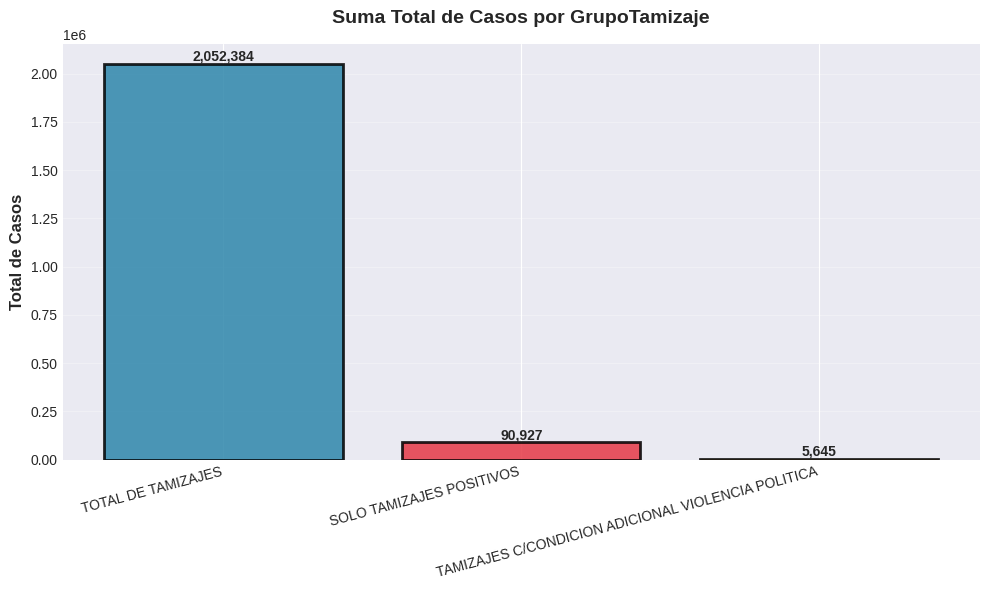


📊 Heatmap: Casos por Tipo de Tamizaje y Grupo



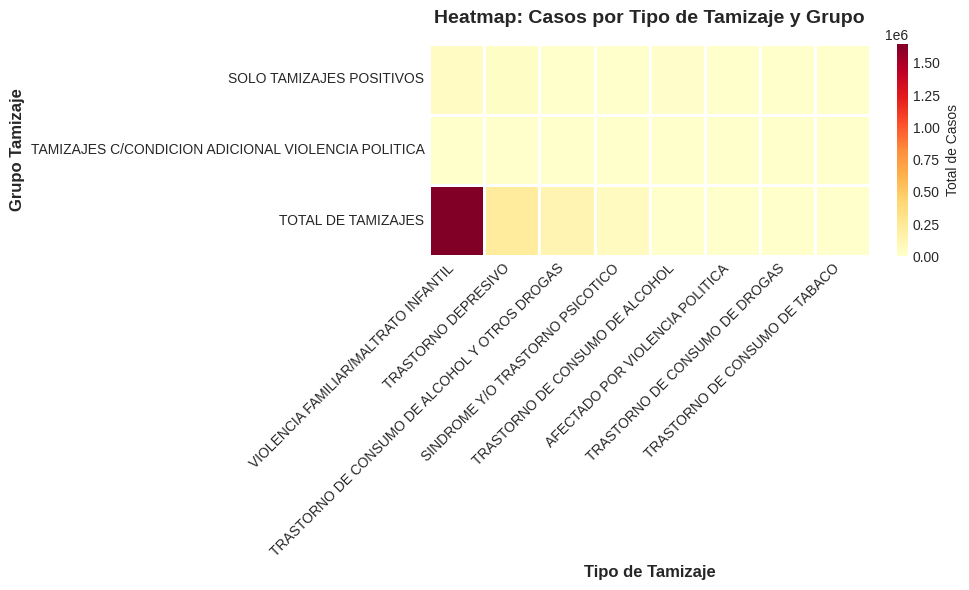


📊 Heatmap: Casos por Departamento y Grupo



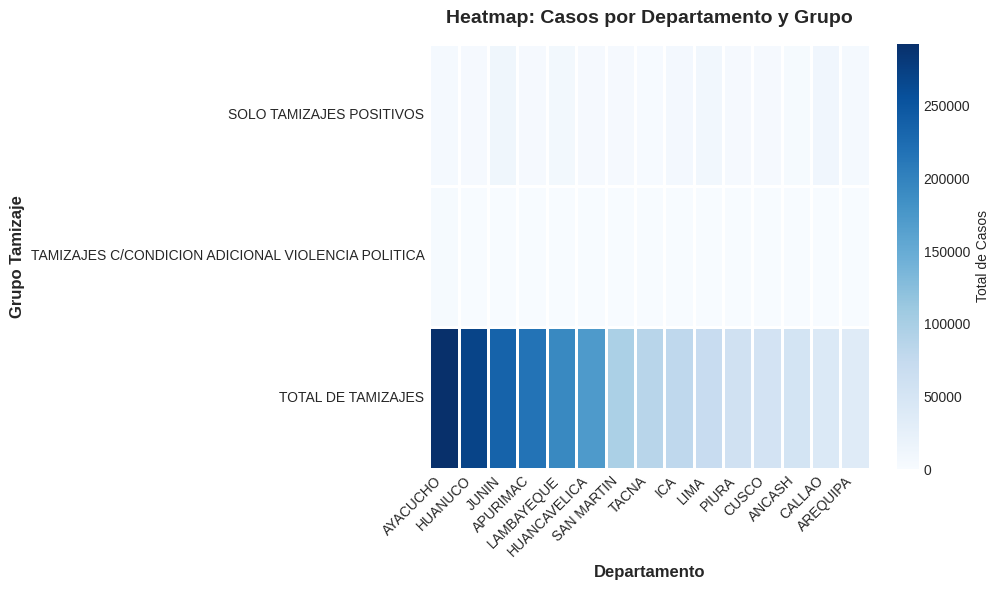

In [ ]:
# =============================================================================
# GRAFICAS SELECCIONADAS (VERSIÓN LIMPIA SIN ANOTACIONES EN HEATMAP)
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# -----------------------------------------------------------------------------
# 1. HISTOGRAMA: Suma total de casos por grupo
# -----------------------------------------------------------------------------
print("\n📊 Suma Total de Casos por GrupoTamizaje\n")

suma_total = df.groupby('GrupoTamizaje')['Casos'].sum().sort_values(ascending=False)
colors = ['#2E86AB', '#E63946', '#F18F01', '#0B6E4F']

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(suma_total)), suma_total.values,
               color=colors[:len(suma_total)], alpha=0.85,
               edgecolor='black', linewidth=2)

plt.xticks(range(len(suma_total)), suma_total.index, rotation=15, ha='right')
plt.ylabel('Total de Casos', fontsize=12, fontweight='bold')
plt.title('Suma Total de Casos por GrupoTamizaje', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3)

# Etiquetas con valores
for i, (bar, valor) in enumerate(zip(bars, suma_total.values)):
    plt.text(bar.get_x() + bar.get_width()/2, valor,
             f'{valor:,.0f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('grafico_1_suma_total_por_grupo.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 2. HEATMAP: Casos por Tipo de Tamizaje y Grupo
# -----------------------------------------------------------------------------
print("\n📊 Heatmap: Casos por Tipo de Tamizaje y Grupo\n")

top_tipos = df.groupby('DetalleTamizaje')['Casos'].sum().nlargest(10).index
df_top_tipos = df[df['DetalleTamizaje'].isin(top_tipos)]

pivot_tipos = df_top_tipos.pivot_table(
    values='Casos',
    index='DetalleTamizaje',
    columns='GrupoTamizaje',
    aggfunc='sum',
    fill_value=0
)
pivot_tipos = pivot_tipos.loc[top_tipos]  # Mantener orden

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_tipos.T, annot=False, cmap='YlOrRd',  # 🔹 Sin números internos
            linewidths=1, linecolor='white',
            cbar_kws={'label': 'Total de Casos'})
plt.xlabel('Tipo de Tamizaje', fontsize=12, fontweight='bold')
plt.ylabel('Grupo Tamizaje', fontsize=12, fontweight='bold')
plt.title('Heatmap: Casos por Tipo de Tamizaje y Grupo',
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('grafico_2_heatmap_tipo_grupo.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 3. HEATMAP: Casos por Departamento y Grupo (SIN ANOTACIONES)
# -----------------------------------------------------------------------------
print("\n📊 Heatmap: Casos por Departamento y Grupo\n")

top_depts = df.groupby('Departamento')['Casos'].sum().nlargest(15).index
df_top_dept = df[df['Departamento'].isin(top_depts)]

pivot_dept = df_top_dept.pivot_table(
    values='Casos',
    index='Departamento',
    columns='GrupoTamizaje',
    aggfunc='sum',
    fill_value=0
)
pivot_dept = pivot_dept.loc[top_depts]

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dept.T, annot=False, cmap='Blues',  # 🔹 Sin valores numéricos
            linewidths=1, linecolor='white',
            cbar_kws={'label': 'Total de Casos'})
plt.xlabel('Departamento', fontsize=12, fontweight='bold')
plt.ylabel('Grupo Tamizaje', fontsize=12, fontweight='bold')
plt.title('Heatmap: Casos por Departamento y Grupo',
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('grafico_3_heatmap_departamento_sin_numeros.png', dpi=300, bbox_inches='tight')
plt.show()


# 3. Data Preparation


### 3.1 Seleccionar data


In [ ]:
# =============================================================================
# 🔄 CALCULANDO TASAS DE POSITIVIDAD
# =============================================================================

# Verificar valores únicos en GrupoTamizaje
print("\n📊 Valores en GrupoTamizaje:")
print(df['GrupoTamizaje'].unique())

# Verificar que Casos sea numérico
if df['Casos'].dtype == 'object':
    print("\n⚠️ Convirtiendo 'Casos' a numérico...")
    df['Casos'] = df['Casos'].astype(str).str.replace(',', '').str.replace(' ', '')
    df['Casos'] = pd.to_numeric(df['Casos'], errors='coerce')
    df['Casos'] = df['Casos'].fillna(0)

# =============================================================================
# 🔄 Separar en dos dataframes
# =============================================================================

df_total = df[df['GrupoTamizaje'].str.contains('TOTAL', case=False, na=False)].copy()
df_positivos = df[df['GrupoTamizaje'].str.contains('POSITIVOS', case=False, na=False)].copy()

print(f"\n✅ Registros de TOTAL: {len(df_total):,}")
print(f"✅ Registros de POSITIVOS: {len(df_positivos):,}")


📊 Valores en GrupoTamizaje:
['TOTAL DE TAMIZAJES' 'SOLO TAMIZAJES POSITIVOS'
 'TAMIZAJES C/CONDICION ADICIONAL VIOLENCIA POLITICA']

✅ Registros de TOTAL: 199,776
✅ Registros de POSITIVOS: 34,977


In [ ]:
# =============================================================================
# 🔄 Generacion de nuevo dataset con los datos seleccionados
# =============================================================================

# Renombrar columna Casos
df_total = df_total.rename(columns={'Casos': 'Total'})
df_positivos = df_positivos.rename(columns={'Casos': 'Positivos'})

# Eliminar GrupoTamizaje
df_total = df_total.drop(columns=['GrupoTamizaje'])
df_positivos = df_positivos.drop(columns=['GrupoTamizaje'])

# Columnas para hacer el join
columnas_join = ['Anio', 'NroMes', 'ubigeo', 'Departamento', 'Provincia','Distrito', 'Sexo', 'Etapa', 'DetalleTamizaje']

# Hacer merge
df_pivot = df_total.merge(
    df_positivos[columnas_join + ['Positivos']],
    on=columnas_join,
    how='left'
)

# Llenar NaN con 0
df_pivot['Positivos'] = df_pivot['Positivos'].fillna(0)

# Calcular tasa de positividad (evitar división por cero)
df_pivot['Tasa_Positividad'] = np.where(
    df_pivot['Total'] > 0,
    (df_pivot['Positivos'] / df_pivot['Total']) * 100,
    0
)

# Eliminar filas donde Total = 0
df_pivot = df_pivot[df_pivot['Total'] > 0].copy()

print(f"\n✅ Dataset preparado: {df_pivot.shape[0]:,} filas x {df_pivot.shape[1]} columnas")
print(f"✅ Tasa promedio global: {df_pivot['Tasa_Positividad'].mean():.2f}%")
print(f"✅ Rango de tasas: {df_pivot['Tasa_Positividad'].min():.2f}% - {df_pivot['Tasa_Positividad'].max():.2f}%")

print("\n📋 Primeras filas del dataset preparado:")
print(df_pivot.head(10))


✅ Dataset preparado: 199,776 filas x 12 columnas
✅ Tasa promedio global: 5.34%
✅ Rango de tasas: 0.00% - 3200.00%

📋 Primeras filas del dataset preparado:
   Anio  NroMes  ubigeo Departamento Provincia       Distrito Sexo    Etapa  \
0  2017       1   20101       ANCASH    HUARAZ         HUARAZ    F  18 - 24   
1  2017       1   20101       ANCASH    HUARAZ         HUARAZ    F  40 - 59   
2  2017       1   20101       ANCASH    HUARAZ         HUARAZ    F    80  +   
3  2017       1   20101       ANCASH    HUARAZ         HUARAZ    M  30 - 39   
4  2017       1   20101       ANCASH    HUARAZ         HUARAZ    M  40 - 59   
5  2017       1   20101       ANCASH    HUARAZ         HUARAZ    M    5 - 9   
6  2017       1   20105       ANCASH    HUARAZ  INDEPENDENCIA    F  15 - 17   
7  2017       1   20105       ANCASH    HUARAZ  INDEPENDENCIA    M  40 - 59   
8  2017       1   20106       ANCASH    HUARAZ         JANGAS    F  18 - 24   
9  2017       1   20205       ANCASH      AIJA        

### 3.2 Limpiar Data

In [ ]:
# ========================================
# INVESTIGAR CASOS IMPOSIBLES
# ========================================

print("=" * 60)
print("🔍 INVESTIGANDO TASAS IMPOSIBLES (> 100%)")
print("=" * 60)

# Filtrar casos imposibles
casos_imposibles = df_pivot[df_pivot['Tasa_Positividad'] > 100].copy()

print(f"\n📊 Casos con tasa > 100%: {len(casos_imposibles):,} registros")
print(f"📊 Porcentaje del total: {len(casos_imposibles)/len(df_pivot)*100:.2f}%")

# Ver los 10 peores casos
print("\n⚠️ TOP 10 TASAS MÁS ALTAS:")
print("=" * 60)

top10 = casos_imposibles.nlargest(10, 'Tasa_Positividad')[
    ['Anio', 'NroMes', 'Departamento', 'DetalleTamizaje', 'Sexo', 'Etapa',
     'Total', 'Positivos', 'Tasa_Positividad']
]

for idx, row in top10.iterrows():
    print(f"\n{row['Departamento']} - {row['DetalleTamizaje'][:40]}")
    print(f"  Año: {row['Anio']}, Mes: {row['NroMes']}")
    print(f"  Sexo: {row['Sexo']}, Edad: {row['Etapa']}")
    print(f"  ❌ Total: {row['Total']} | Positivos: {row['Positivos']}")
    print(f"  ❌ Tasa calculada: {row['Tasa_Positividad']:.2f}%")
    print(f"  ⚠️ PROBLEMA: Positivos ({row['Positivos']}) > Total ({row['Total']})")

# Verificar el patrón
print("\n" + "=" * 60)
print("📊 ANÁLISIS DE CASOS IMPOSIBLES")
print("=" * 60)

print(f"\n¿Cuántos tienen Positivos > Total?")
positivos_mayores = (casos_imposibles['Positivos'] > casos_imposibles['Total']).sum()
print(f"  → {positivos_mayores:,} casos ({positivos_mayores/len(casos_imposibles)*100:.1f}%)")

print(f"\n📊 Estadísticas de casos imposibles:")
print(f"  • Total promedio: {casos_imposibles['Total'].mean():.1f}")
print(f"  • Positivos promedio: {casos_imposibles['Positivos'].mean():.1f}")
print(f"  • Tasa promedio: {casos_imposibles['Tasa_Positividad'].mean():.1f}%")
print(f"  • Tasa máxima: {casos_imposibles['Tasa_Positividad'].max():.1f}%")

🔍 INVESTIGANDO TASAS IMPOSIBLES (> 100%)

📊 Casos con tasa > 100%: 169 registros
📊 Porcentaje del total: 0.08%

⚠️ TOP 10 TASAS MÁS ALTAS:

LIMA - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 5
  Sexo: F, Edad: 40 - 59
  ❌ Total: 1 | Positivos: 32.0
  ❌ Tasa calculada: 3200.00%
  ⚠️ PROBLEMA: Positivos (32.0) > Total (1)

JUNIN - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 6
  Sexo: F, Edad: 40 - 59
  ❌ Total: 1 | Positivos: 11.0
  ❌ Tasa calculada: 1100.00%
  ⚠️ PROBLEMA: Positivos (11.0) > Total (1)

CUSCO - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 6
  Sexo: F, Edad: 40 - 59
  ❌ Total: 2 | Positivos: 12.0
  ❌ Tasa calculada: 600.00%
  ⚠️ PROBLEMA: Positivos (12.0) > Total (2)

CUSCO - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 6
  Sexo: M, Edad: 30 - 39
  ❌ Total: 1 | Positivos: 6.0
  ❌ Tasa calculada: 600.00%
  ⚠️ PROBLEMA: Positivos (6.0) > Total (1)

LIMA - VIOLENCIA FAMILIAR/MALTRATO INFANTIL
  Año: 2017, Mes: 1
  Sexo: M, Edad: 30 -

In [ ]:
# ========================================
# LIMPIEZA COMPLETA DEL DATASET
# ========================================

print("\n" + "=" * 60)
print("🧹 LIMPIEZA COMPLETA DE DATOS")
print("=" * 60)

print(f"\n📊 ANTES DE LIMPIEZA:")
print(f"  • Total registros: {len(df_pivot):,}")
print(f"  • Tasa promedio: {df_pivot['Tasa_Positividad'].mean():.2f}%")
print(f"  • Tasa máxima: {df_pivot['Tasa_Positividad'].max():.2f}%")
print(f"  • Registros con tasa 0%: {(df_pivot['Tasa_Positividad'] == 0).sum():,}")

# LIMPIEZA: Eliminar tasas imposibles (> 100%)
df_clean = df_pivot[df_pivot['Tasa_Positividad'] <= 100].copy()
print(f"\n🗑️ Eliminados por tasa > 100%: {len(df_pivot) - len(df_clean):,}")


print(f"\n📊 DESPUÉS DE LIMPIEZA:")
print(f"  • Total registros (con ceros): {len(df_clean):,}")
print(f"  • Tasa promedio (con ceros): {df_clean['Tasa_Positividad'].mean():.2f}%")
print(f"  • Tasa máxima: {df_clean['Tasa_Positividad'].max():.2f}%")

print("\n📊 Nueva distribución (con ceros):")
print(df_clean['Tasa_Positividad'].describe())
print("\n📊 Nueva distribución (solo activos):")


# Guardar datasets limpios
df_clean.to_csv('dataset_limpio.csv', index=False, encoding='utf-8-sig')

print("\n💾 Datasets guardados:")
print("  • dataset_limpio.csv (incluye registros con tasa 0%)")


🧹 LIMPIEZA COMPLETA DE DATOS

📊 ANTES DE LIMPIEZA:
  • Total registros: 199,776
  • Tasa promedio: 5.34%
  • Tasa máxima: 3200.00%
  • Registros con tasa 0%: 171,525

🗑️ Eliminados por tasa > 100%: 169

📊 DESPUÉS DE LIMPIEZA:
  • Total registros (con ceros): 199,607
  • Tasa promedio (con ceros): 5.15%
  • Tasa máxima: 100.00%

📊 Nueva distribución (con ceros):
count    199607.000000
mean          5.149170
std          18.211234
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: Tasa_Positividad, dtype: float64

📊 Nueva distribución (solo activos):

💾 Datasets guardados:
  • dataset_limpio.csv (incluye registros con tasa 0%)


In [ ]:
print(f"\n📊 Mostrar 3 primeras filas de dataset limpio:")
df_clean.head(3)


📊 Mostrar 3 primeras filas de dataset limpio:


,Anio,NroMes,ubigeo,Departamento,Provincia,Distrito,Sexo,Etapa,DetalleTamizaje,Total,Positivos,Tasa_Positividad
0,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,18 - 24,SINDROME Y/O TRASTORNO PSICOTICO,17,0.0,0.0
1,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,40 - 59,TRASTORNO DEPRESIVO,2,0.0,0.0
2,2017,1,20101,ANCASH,HUARAZ,HUARAZ,F,80 +,SINDROME Y/O TRASTORNO PSICOTICO,1,0.0,0.0


### 3.3 Construir data

In [ ]:
# ========================================
# Ingenieria de caracteristicas
# ========================================

print("\n" + "=" * 60)
print("🛠️ Ingenieria de caracteristicas")
print("=" * 60)
print(f"\n - Se seleccionan las caracteristicas en formato object para convertir a formato númerico (ONE-HOT-ENCODING): Departamento,Sexo,DetalleTamizaje,Etapa")

multi_cat_cols = ["Departamento","Sexo","DetalleTamizaje","Etapa"]
df_clean_activo_new = pd.get_dummies(df_clean, columns=multi_cat_cols, dtype=int)

print(f"\n - Se eliminan columnas: Provincia y Distrito")
df_clean_to_model = df_clean_activo_new.drop(columns=['Provincia','Distrito'])

print("\n" + "=" * 60)
print("📊 Resultado")
print("=" * 60)

df_clean_to_model.info()

print("\n" + "=" * 60)
print("📊 Seleccion de variables X e y")
print("=" * 60)
X = df_clean_to_model.drop(columns=['Tasa_Positividad', 'Total', 'Positivos'])
y = df_clean_to_model['Tasa_Positividad']


🛠️ Ingenieria de caracteristicas

 - Se seleccionan las caracteristicas en formato object para convertir a formato númerico (ONE-HOT-ENCODING): Departamento,Sexo,DetalleTamizaje,Etapa

 - Se eliminan columnas: Provincia y Distrito

📊 Resultado
<class 'pandas.core.frame.DataFrame'>
Index: 199607 entries, 0 to 199775
Data columns (total 47 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Anio                                                            199607 non-null  int64  
 1   NroMes                                                          199607 non-null  int64  
 2   ubigeo                                                          199607 non-null  int64  
 3   Total                                                           199607 non-null  int64  
 4   Positivos                                                       199607 non-null 

### 3.4 Integrar data

In [ ]:
print("\n" + "=" * 60)
print("📊 Creacion de nuevo dataset con la data obtenida")
print("=" * 60)

# Guardar dataset
df_clean_to_model.to_csv('df_clean_to_model.csv', index=False, encoding='utf-8-sig')
print("\n💾 Datasets guardados:")
print("  • df_clean_to_model.csv")


📊 Creacion de nuevo dataset con la data obtenida

💾 Datasets guardados:
  • df_clean_to_model.csv


### 3.5 Reformatear data

In [ ]:
print("\n" + "=" * 60)
print("📊 Balanceo de Datos (SMOTE + Undersampling)")
print("=" * 60)

import numpy as np
from sklearn.neighbors import NearestNeighbors

def balance_zero_non_zero(X, y, zero_ratio=0.5, oversample_factor=2):
    """
    Combina submuestreo de ceros y sobremuestreo de positivos
    """
    zero_mask = (y == 0)
    non_zero_mask = ~zero_mask

    X_zero = X[zero_mask]
    y_zero = y[zero_mask]
    X_non_zero = X[non_zero_mask]
    y_non_zero = y[non_zero_mask]

    print(f"Original - Ceros: {len(y_zero)} | Positivos: {len(y_non_zero)}")

    # PASO 1: Submuestrear ceros
    n_zeros_keep = int(len(y_non_zero) / (1 - zero_ratio) * zero_ratio)
    if n_zeros_keep < len(y_zero):
        zero_indices = np.random.choice(len(y_zero), n_zeros_keep, replace=False)
        X_zero_sampled = X_zero.iloc[zero_indices]
        y_zero_sampled = y_zero.iloc[zero_indices]
    else:
        X_zero_sampled = X_zero
        y_zero_sampled = y_zero

    print(f"Submuestreo - Ceros retenidos: {len(y_zero_sampled)}")

    # PASO 2: Sobremuestrear positivos
    n_synthetic = int(len(X_non_zero) * (oversample_factor - 1))

    # Asegurarse de que k sea válido
    k = min(5, len(X_non_zero) - 1)
    if k < 1:
        print("No hay suficientes positivos para sobremuestrear. Solo se submuestrearon los ceros.")
        # No hay suficientes positivos, solo submuestrear ceros
        X_res = pd.concat([X_zero_sampled, X_non_zero], ignore_index=True)
        y_res = pd.concat([y_zero_sampled, y_non_zero], ignore_index=True)
        return X_res, y_res

    knn = NearestNeighbors(n_neighbors=k + 1)
    knn.fit(X_non_zero)

    synthetic_X = []
    synthetic_y = []

    for _ in range(n_synthetic):
        idx = np.random.randint(0, len(X_non_zero))
        sample_X = X_non_zero.iloc[idx].values
        sample_y = y_non_zero.iloc[idx]

        neighbors_idx = knn.kneighbors([sample_X], return_distance=False)[0]
        neighbor_idx = np.random.choice(neighbors_idx[1:]) # [1:] para excluirse a sí mismo

        alpha = np.random.random()
        neighbor_X = X_non_zero.iloc[neighbor_idx].values
        neighbor_y = y_non_zero.iloc[neighbor_idx]

        synthetic_sample_X = sample_X + alpha * (neighbor_X - sample_X)
        synthetic_sample_y = sample_y + alpha * (neighbor_y - sample_y)

        synthetic_X.append(synthetic_sample_X)
        synthetic_y.append(synthetic_sample_y)

    # Combinar
    synthetic_X_df = pd.DataFrame(synthetic_X, columns=X.columns)
    synthetic_y_series = pd.Series(synthetic_y)

    X_res = pd.concat([X_zero_sampled, X_non_zero, synthetic_X_df], ignore_index=True)
    y_res = pd.concat([y_zero_sampled, y_non_zero, synthetic_y_series], ignore_index=True)
    y_res.name = 'Tasa_Positividad'

    print(f"\nBalanceado - Ceros: {(y_res == 0).sum()} | Positivos: {(y_res > 0).sum()}")

    return X_res, y_res
# ---------------------------------------------------

# 1. Asignar dataFrame codificado
df_codificado = df_clean_to_model

# 2. Separa X (features) e y (target)
y = df_codificado['Tasa_Positividad']

# X es TODO menos el target y las columnas de fuga de datos
X = df_codificado.drop(columns=['Tasa_Positividad', 'Total', 'Positivos'])

print(f"Forma de X (features): {X.shape}")
print(f"Forma de y (target): {y.shape}")

# 3. Función de balanceo
X_res, y_res = balance_zero_non_zero(X, y, zero_ratio=0.3, oversample_factor=2)

# 4. Resultados
print(f"\nForma final balanceada: X={X_res.shape}, y={y_res.shape}")


📊 Balanceo de Datos (SMOTE + Undersampling)
Forma de X (features): (199607, 44)
Forma de y (target): (199607,)
Original - Ceros: 171525 | Positivos: 28082
Submuestreo - Ceros retenidos: 12035

Balanceado - Ceros: 12035 | Positivos: 56164

Forma final balanceada: X=(68199, 44), y=(68199,)


CREANDO DATAFRAME BALANCEADO

✓ DataFrame balanceado creado
  Dimensiones: (68199, 45)
  Ceros: 12035
  Positivos: 56164
  Proporción ceros: 17.65%

✓ DataFrame balanceado guardado como 'dataset_balanceado.csv'

📋 INFO DEL DATAFRAME BALANCEADO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68199 entries, 0 to 68198
Data columns (total 45 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Anio                                                            68199 non-null  float64
 1   NroMes                                                          68199 non-null  float64
 2   ubigeo                                                          68199 non-null  float64
 3   Departamento_ANCASH                                             68199 non-null  float64
 4   Departamento_APURIMAC                                           68199 non-null  flo

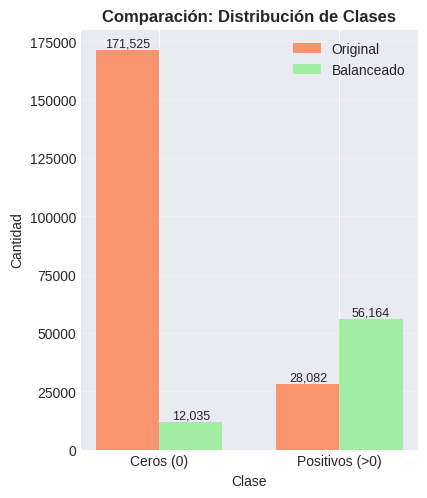

In [ ]:
# ============================================================
# 1. CREAR DATAFRAME BALANCEADO
# ============================================================
print("="*60)
print("CREANDO DATAFRAME BALANCEADO")
print("="*60)

# Combinar X_res e y_res en un solo DataFrame
df_balanced = X_res.copy()
df_balanced['Tasa_Positividad'] = y_res.values

print(f"\n✓ DataFrame balanceado creado")
print(f"  Dimensiones: {df_balanced.shape}")
print(f"  Ceros: {(df_balanced['Tasa_Positividad'] == 0).sum()}")
print(f"  Positivos: {(df_balanced['Tasa_Positividad'] > 0).sum()}")
print(f"  Proporción ceros: {(df_balanced['Tasa_Positividad'] == 0).sum() / len(df_balanced):.2%}")

# Guardar el DataFrame balanceado
df_balanced.to_csv('dataset_balanceado.csv', index=False)
print(f"\n✓ DataFrame balanceado guardado como 'dataset_balanceado.csv'")

# Mostrar información del DataFrame
print("\n📋 INFO DEL DATAFRAME BALANCEADO:")
df_balanced.info()

# ============================================================
# 2. ANÁLISIS COMPARATIVO: ORIGINAL VS BALANCEADO
# ============================================================
print("\n" + "="*60)
print("GENERANDO VISUALIZACIONES")
print("="*60)

fig = plt.figure(figsize=(20, 12))

# --- Subplot 1: Comparación de distribución de clases ---
ax1 = plt.subplot(2, 4, 1)
original_counts = [(y == 0).sum(), (y > 0).sum()]
balanced_counts = [(y_res == 0).sum(), (y_res > 0).sum()]

x = np.arange(2)
width = 0.35

bars1 = ax1.bar(x - width/2, original_counts, width, label='Original', alpha=0.8, color='coral')
bars2 = ax1.bar(x + width/2, balanced_counts, width, label='Balanceado', alpha=0.8, color='lightgreen')

ax1.set_xlabel('Clase')
ax1.set_ylabel('Cantidad')
ax1.set_title('Comparación: Distribución de Clases', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(['Ceros (0)', 'Positivos (>0)'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Agregar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=9)


IV. Modelo


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Se añade mean_absolute_error (MAE)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Cargar el dataset
df = pd.read_csv('dataset_balanceado.csv', encoding='latin-1', sep=',')

# 2. Definir X (características) e y (objetivo)
# y es nuestra variable objetivo
y = df['Tasa_Positividad']

# X contiene todas las demás características.
# Eliminamos el objetivo 'Tasa_Positividad' y 'Anio' (valor constante).
X = df.drop(columns=['Tasa_Positividad', 'Anio'])

# 3. Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} filas")
print(f"Datos de prueba: {X_test.shape[0]} filas")

# 4. Inicializar y Entrenar el modelo Random Forest Regressor
print("\nEntrenando el modelo Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100,
                                 random_state=42,
                                 n_jobs=-1,
                                 oob_score=True)
rf_model.fit(X_train, y_train)
print("Entrenamiento completado.")

# 5. Realizar predicciones y Evaluar el modelo
y_pred = rf_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
oob = rf_model.oob_score_
# --- NUEVA LÍNEA ---
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Resultados de Evaluación del Modelo ---")
print(f"R^2 (Coeficiente de Determinación): {r2:.4f}")
print(f"Out-of-Bag (OOB) Score: {oob:.4f}")
# --- NUEVA LÍNEA ---
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

# 6. Obtener la Importancia de las Características
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para una mejor visualización
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Características Más Importantes ---")
# Imprimir las 10 características principales en formato markdown
print(feature_importance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))